**A lire à 
la première ouverture de ce fichier :**


* Ce fichier est en Lecture seule. Vous ne pouvez pas exécutez les cellules ni le modifier. 

Pour cette raison :   
* Faites-en une copie par Fichier / Enregistrer une copie dans Drive
*   Renommer le fichier en Prenom_Nom_03_Pandas_eleves.ipynb
* Partagez (en haut à droite) ce notebook avec le compte nsi.glassus@gmail.com afin que j'ai une visibilité sur votre travail. Faites bien attention à m'accorder un partage avec droit de modification.
* Vous pouvez maintenant éxecuter, modifier les cellules, répondre aux questions...
* Et je peux moi venir en temps réel voir votre travail et écrire dans vos cellules.




# Utilisation du module Pandas
Le module `csv` utilisé précédemment se contente de lire les données structurées. Il ne fait aucun effort particulier pour analyser les données. Nous nous en sommes aperçus lorsqu'il a fallu convertir par `int()` toutes les valeurs numériques, qui étaient interprétées comme des chaînes de caractères.  
La bibliothèque `pandas` est par contre spécialement conçue pour l'analyse des données (*data analysis*) : elle est donc naturellement bien plus performante.

In [0]:
import pandas as pd #import du module pandas, abrégé classiquement par "pd"

In [0]:
df = pd.read_csv('http://glassus1.free.fr/top14.csv', encoding = 'utf-8')

La variable est nommée classiquement `df` pour *dataframe* (que l'on peut traduire par *table de données*)

In [3]:
type(df)

pandas.core.frame.DataFrame

## Premiers renseignements sur les fichiers de données

Que contient la variable `df`?

In [4]:
df

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
0,Agen,Anton PEIKRISHVILI,Pilier,18/09/1987,183,122
1,Agen,Dave RYAN,Pilier,21/04/1986,183,116
2,Agen,Giorgi TETRASHVILI,Pilier,31/08/1993,177,112
3,Agen,Kamaliele TUFELE,Pilier,11/10/1995,182,123
4,Agen,Malino VANAÏ,Pilier,04/05/1993,183,119
...,...,...,...,...,...,...
590,Toulouse,Werner KOK,Ailier,27/01/1993,177,78
591,Toulouse,Yoann HUGET,Ailier,02/06/1987,190,97
592,Toulouse,Matthis LEBEL,Arrière,25/03/1999,185,91
593,Toulouse,Maxime MÉDARD,Arrière,16/11/1986,180,85


Les données sont présentées dans l'ordre originel du fichier. 
Il est possible d'avoir uniquement les premières lignes du fichier avec la commande `head()` et les dernières du fichier avec la commande `tail()`. Ces commandes peuvent recevoir en paramètre un nombre entier.

In [5]:
df.head()

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
0,Agen,Anton PEIKRISHVILI,Pilier,18/09/1987,183,122
1,Agen,Dave RYAN,Pilier,21/04/1986,183,116
2,Agen,Giorgi TETRASHVILI,Pilier,31/08/1993,177,112
3,Agen,Kamaliele TUFELE,Pilier,11/10/1995,182,123
4,Agen,Malino VANAÏ,Pilier,04/05/1993,183,119


In [7]:
df.tail()

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
590,Toulouse,Werner KOK,Ailier,27/01/1993,177,78
591,Toulouse,Yoann HUGET,Ailier,02/06/1987,190,97
592,Toulouse,Matthis LEBEL,Arrière,25/03/1999,185,91
593,Toulouse,Maxime MÉDARD,Arrière,16/11/1986,180,85
594,Toulouse,Thomas RAMOS,Arrière,23/07/1995,178,86


In [6]:
df.head(3)

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
0,Agen,Anton PEIKRISHVILI,Pilier,18/09/1987,183,122
1,Agen,Dave RYAN,Pilier,21/04/1986,183,116
2,Agen,Giorgi TETRASHVILI,Pilier,31/08/1993,177,112


Pour avoir des renseignements globaux sur la structure de notre fichier, on peut utiliser la commande `df.info()`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 6 columns):
Equipe               595 non-null object
Nom                  595 non-null object
Poste                595 non-null object
Date de naissance    595 non-null object
Taille               595 non-null int64
Poids                595 non-null int64
dtypes: int64(2), object(4)
memory usage: 28.0+ KB


Pour accéder à une fiche particulière de joueur, on peut utiliser la fonction `loc()` :

In [9]:
df.loc[45]

Equipe                             Bayonne
Nom                  Torsten VAN JAARSVELD
Poste                            Talonneur
Date de naissance               30/06/1987
Taille                                 175
Poids                                  106
Name: 45, dtype: object

## Extraction de colonnes, création de graphiques 
Pour créer une liste contenant uniquement les données numériques de la colonne poids, il suffit d'écrire :

In [0]:
poids = df['Poids']

Attention, la variable `poids` n'est pas une liste qui contiendrait `[122,116,112,...]` mais un type particulier à `pandas`, appelé "Series".

In [11]:
print(poids)

0      122
1      116
2      112
3      123
4      119
      ... 
590     78
591     97
592     91
593     85
594     86
Name: Poids, Length: 595, dtype: int64


In [12]:
type(poids)

pandas.core.series.Series

On peut néanmoins s'en servir comme d'une liste classique.

In [13]:
poids[0]

122

On voit donc que les données sont automatiquement traitées comme des nombres. Pas besoin de conversion comme avec le module `csv` !

Pour tracer notre nuage de points poids-taille, le code sera donc simplement :

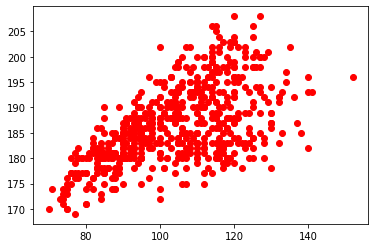

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
X = df['Poids']
Y = df['Taille']

plt.plot(X,Y,'ro') # r pour red, o pour un cercle. voir https://matplotlib.org/api/markers_api.html
plt.show()

L'interprétation numérique permet à `pandas` d'analyser automatiquement les données, avec notamment la fonction `describe()`.

In [15]:
df['Taille'].describe()

count    595.000000
mean     186.559664
std        7.572615
min      169.000000
25%      181.000000
50%      186.000000
75%      192.000000
max      208.000000
Name: Taille, dtype: float64

On voit donc que les indicateurs statistiques sont proposés automatiquent. 
D'ailleurs, on peut très facilement tracer des boites à moustaches avec `boxplot()`.

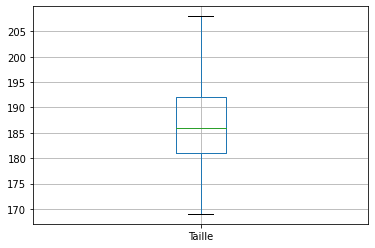

In [16]:
df.boxplot("Taille")

Pour les données non-numériques, la commande `describe()` n'est que peu d'utilité. Elle renseigne toutefois la valeur la plus fréquente (en statistiques, le *mode* ou *valeur modale*)

In [21]:
df['Poste'].describe().top

'3ème ligne'

Pour connaître par exemple la date de naissance la plus fréquente chez les joueurs du top14, on utilisera simplement :

In [18]:
df['Date de naissance'].describe().top

'07/08/1990'

Qui sont les joueurs nés à cette date ?

In [19]:
print(df['Nom'][df['Date de naissance'] == '23/04/1993'])

157      Rory SCHOLES
382     Laurent PANIS
567    Alban PLACINES
Name: Nom, dtype: object


Beaucoup plus de renseignements sont donnés par la commande `value_counts()`.

In [20]:
df['Taille'].value_counts()

180    52
183    40
188    35
181    31
185    31
182    29
184    25
187    25
190    25
193    24
186    24
189    21
178    20
177    18
192    17
198    17
195    16
191    16
196    15
194    14
200    12
174     9
175     9
179     9
202     9
176     8
199     6
197     6
201     5
203     4
172     4
204     3
170     3
206     3
171     3
173     3
208     2
205     1
169     1
Name: Taille, dtype: int64

## Filtres et recherches
Comment créer une *dataframe* ne contenant que les joueurs de l'UBB ?  

L'idée syntaxique est d'écrire à l'intérieur de `df[]` le test qui permettra le filtrage.

In [0]:
UBB = df[df['Equipe'] == 'Bordeaux']

In [22]:
UBB

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
80,Bordeaux,Jefferson POIROT,Pilier,01/11/1992,181,117
81,Bordeaux,Lasha TABIDZE,Pilier,04/07/1997,185,117
82,Bordeaux,Laurent DELBOULBÈS,Pilier,17/11/1986,181,106
83,Bordeaux,Lekso KAULASHVILI,Pilier,27/08/1992,187,120
84,Bordeaux,Peni RAVAI,Pilier,16/06/1990,185,119
85,Bordeaux,Thierry PAÏVA,Pilier,19/11/1995,184,125
86,Bordeaux,Vadim COBILAS,Pilier,30/07/1983,180,118
87,Bordeaux,Adrien PÉLISSIÉ,Talonneur,07/08/1990,181,110
88,Bordeaux,Clément MAYNADIER,Talonneur,11/10/1988,187,100
89,Bordeaux,Alexandre FLANQUART,2ème ligne,09/10/1989,204,120


### Exercice  1

Créer une dataframe `gros` qui contient les joueurs de plus de 135 kg.

In [0]:
gros = df[df['Poids'] > 135] ; gros

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
48,Bayonne,Edwin MAKA,2ème ligne,25/01/1993,196,140
167,Castres,Tapu FALATEA,Pilier,12/12/1988,187,137
253,La Rochelle,Uini ATONIO,Pilier,26/03/1990,196,152
324,Montpellier,Antoine GUILLAMON,Pilier,04/06/1991,192,136
373,Paris,Christopher VAOTOA,Pilier,16/11/1996,185,138
425,Pau,Malik HAMADACHE,Pilier,17/10/1988,193,141
465,Racing92,Ali OZ,Pilier,28/05/1995,193,140
466,Racing92,Ben TAMEIFUNA,Pilier,30/08/1991,182,140


### Exercice  2

Créer une dataframe `grand_gros` qui contient les joueurs de plus de 2m et plus de 120 kg.

In [8]:
grand_gros = df[(df['Poids'] > 120) & (df['Taille'] > 200)]
grand_gros

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
0,Agen,Anton PEIKRISHVILI,Pilier,18/09/1987,183,122
3,Agen,Kamaliele TUFELE,Pilier,11/10/1995,182,123
12,Agen,Mickaël DE MARCO,2ème ligne,22/04/1989,195,134
13,Agen,Pierce PHILLIPS,2ème ligne,06/10/1992,203,119
35,Bayonne,Census JOHNSTON,Pilier,06/05/1981,189,130
...,...,...,...,...,...,...
562,Toulouse,Florian VERHAEGHE,2ème ligne,27/04/1997,202,108
563,Toulouse,Iosefa TEKORI,2ème ligne,17/12/1983,198,127
564,Toulouse,Richie ARNOLD,2ème ligne,01/07/1990,208,127
565,Toulouse,Richie GRAY,2ème ligne,24/08/1989,206,125


### Exercice  3

Trouver en une seule ligne le joueur le plus léger du Top14.

In [16]:
df['Nom'][df['Poids'] == min(df['Poids'])]
print(df['Nom'][df['Poids'].idxmin])


Dylan HAYES


## Tris de données
Le tri se fait par la fonction `sort_values()` :

In [0]:
newdf = df.sort_values(by=['Poids'], ascending = True)

In [34]:
newdf.head(10)

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
491,Racing92,Teddy IRIBAREN,Mêlée,25/09/1990,170,70
102,Bordeaux,Yann LESGOURGUES,Mêlée,17/01/1991,174,71
545,Toulon,Gervais CORDIN,Arrière,10/12/1998,172,73
353,Montpellier,Benoît PAILLAUGUE,Mêlée,17/11/1987,172,74
143,Brive,Quentin DELORD,Mêlée,10/02/1999,171,74
578,Toulouse,Sébastien BÉZY,Mêlée,22/11/1991,174,74
446,Pau,Clovis LE BAIL,Mêlée,29/11/1995,173,74
64,Bayonne,Guillaume ROUET,Mêlée,13/08/1988,170,75
364,Montpellier,Gabriel N'GANDEBE,Ailier,30/03/1997,174,75
283,La Rochelle,Marc ANDREU,Ailier,27/12/1985,170,75


## Rajout d'une colonne
Afin de pouvoir trier les joueurs suivant de nouveaux critères, nous allons rajouter un champ pour chaque joueur.
Prenons un exemple stupide : fabriquons un nouveau champ `'Poids après les vacances'` qui contiendra le poids des joueurs augmenté de 8 kg. 
Ceci se fera simplement par :


In [0]:
df['Poids après les vacances'] = df['Poids'] + 8

In [36]:
df.head()

,Equipe,Nom,Poste,Date de naissance,Taille,Poids,Poids après les vacances
0,Agen,Anton PEIKRISHVILI,Pilier,18/09/1987,183,122,130
1,Agen,Dave RYAN,Pilier,21/04/1986,183,116,124
2,Agen,Giorgi TETRASHVILI,Pilier,31/08/1993,177,112,120
3,Agen,Kamaliele TUFELE,Pilier,11/10/1995,182,123,131
4,Agen,Malino VANAÏ,Pilier,04/05/1993,183,119,127


Pour supprimer cette colonne sans intérêt, faisons :

In [0]:
del df['Poids après les vacances'] 

In [38]:
df.head()

,Equipe,Nom,Poste,Date de naissance,Taille,Poids
0,Agen,Anton PEIKRISHVILI,Pilier,18/09/1987,183,122
1,Agen,Dave RYAN,Pilier,21/04/1986,183,116
2,Agen,Giorgi TETRASHVILI,Pilier,31/08/1993,177,112
3,Agen,Kamaliele TUFELE,Pilier,11/10/1995,182,123
4,Agen,Malino VANAÏ,Pilier,04/05/1993,183,119


### Exercice  4

1. Créer une colonne contenant l'IMC de chaque joueur
2. Créer une nouvelle dataframe contenant tous les joueurs du top14 classés par ordre d'IMC croissant.

In [19]:
df['IMC'] = df['Poids'] / (df['Taille']/100)**2
df.head()

,Equipe,Nom,Poste,Date de naissance,Taille,Poids,IMC
0,Agen,Anton PEIKRISHVILI,Pilier,18/09/1987,183,122,36.429872
1,Agen,Dave RYAN,Pilier,21/04/1986,183,116,34.638239
2,Agen,Giorgi TETRASHVILI,Pilier,31/08/1993,177,112,35.749625
3,Agen,Kamaliele TUFELE,Pilier,11/10/1995,182,123,37.133196
4,Agen,Malino VANAÏ,Pilier,04/05/1993,183,119,35.534056


In [20]:
imcdf = df.sort_values(by=['IMC'], ascending = True)
imcdf

,Equipe,Nom,Poste,Date de naissance,Taille,Poids,IMC
102,Bordeaux,Yann LESGOURGUES,Mêlée,17/01/1991,174,71,23.450918
77,Bayonne,Aymeric LUC,Arrière,14/10/1997,180,76,23.456790
66,Bayonne,Brandon FAJARDO,Ouverture,25/06/1994,181,77,23.503556
141,Brive,David DELARUE,Mêlée,27/10/1996,190,85,23.545706
200,Castres,Martin LAVEAU,Ailier,10/09/1996,182,78,23.547881
...,...,...,...,...,...,...,...
376,Paris,Paul ALO-EMILE,Pilier,22/12/1991,180,128,39.506173
253,La Rochelle,Uini ATONIO,Pilier,26/03/1990,196,152,39.566847
373,Paris,Christopher VAOTOA,Pilier,16/11/1996,185,138,40.321402
511,Toulon,Sébastien TAOFIFENUA,Pilier,21/03/1992,178,130,41.030173
